In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
path_data='/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/scRNA/combined/'

In [3]:
# Saving figures
path_fig='/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/figures/paper/'
sc._settings.ScanpyConfig.figdir=Path(path_fig)

In [4]:
adata_rn_b=sc.read(path_data+'data_rawnorm_integrated_analysed_beta_v1s1_sfintegrated.h5ad')
adata_rn_b.shape

(102143, 30672)

In [5]:
# Known markers
genes=['Ins1','Mafa','Rbp4','Cdkn2a','Gast','B2m']

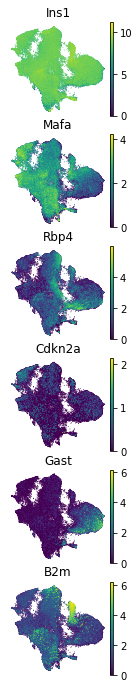

In [6]:
# Plot known markers
fig,ax=plt.subplots(len(genes),1,figsize=(2,2*len(genes)))
np.random.seed(0)
random_indices=np.random.permutation(list(range(adata_rn_b.shape[0])))
for idx,gene in enumerate(genes):
    sc.pl.embedding(adata_rn_b[random_indices,:],'X_umap_opt',
           color=gene,gene_symbols='gene_symbol',
           s=3, ncols=6, frameon=False, ax=ax[idx],show=False)
#fig.tight_layout()
plt.savefig(path_fig+'umap_beta_markers_integration_eopt.png',dpi=300,bbox_inches='tight')

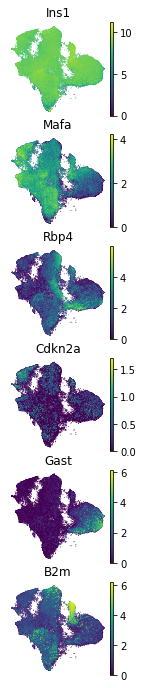

In [6]:
# Plot known markers without low quality beta cells
fig,ax=plt.subplots(len(genes),1,figsize=(2,2*len(genes)))
np.random.seed(0)
subset=~adata_rn_b.obs['leiden_r1.5_parsed_const'].str.contains('low_quality')
random_indices=np.random.permutation(list(range(adata_rn_b[subset,:].shape[0])))
for idx,gene in enumerate(genes):
    sc.pl.embedding(adata_rn_b[subset,:][random_indices,:],'X_umap_opt',
           color=gene,gene_symbols='gene_symbol',
           s=3, ncols=6, frameon=False, ax=ax[idx],show=False)
#fig.tight_layout()
plt.savefig(path_fig+'umap_beta_markers_integration_nolowQ_eopt.png',dpi=300,bbox_inches='tight')

In [7]:
path_fig+'umap_beta_markers_integration_eopt.png'

'/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/figures/paper/umap_beta_markers_integration_eopt.png'